<h1><center>ASHRAE - Great Energy Predictor III -  Modeling💡</center></h1>

# Libraries 📚

In [1]:
import numpy as np
import pandas as pd

import pandas_profiling
from pandas_profiling.utils.cache import cache_file
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from interim files

In [2]:
train_weather_grpsite_df = pd.read_pickle("../data/interim/train_weather_grpsite_df")
train_build_df = pd.read_pickle("../data/interim/train_build_df")
train_weather_df = pd.read_pickle("../data/interim/train_weather_df")

In [3]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import datetime as dt

In [4]:
(train_weather_df.isnull().sum()/train_weather_df.count().max()*100).sort_values()

timestamp              0.000000
floor_count            0.000000
year_built             0.000000
primary_use            0.000000
site_id                0.000000
square_feet            0.000000
building_id            0.000000
wind_direction         0.384856
air_temperature        0.384856
cloud_coverage         0.384856
dew_temperature        0.384856
precip_depth_1_hr      0.384856
sea_level_pressure     0.384856
wind_speed             0.384856
Electricity            2.687502
ChilledWater          66.254314
Steam                 78.144964
HotWater              89.801218
dtype: float64

In [5]:
train_weather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,12393999.0,716.663162,416.126467,0.0,354.0000,716.0000,1078.000,1448.0
Electricity,12060910.0,170.825636,380.834307,0.0,19.5000,62.8319,170.075,79769.0
ChilledWater,4182440.0,633.363924,7988.213146,0.0,11.3288,120.4870,464.314,880374.0
Steam,2708713.0,13882.187689,418313.503638,0.0,45.7500,257.8120,1035.320,21904700.0
HotWater,1264037.0,385.866781,2508.172498,0.0,0.0000,39.6237,241.285,160187.0
site_id,12393999.0,6.873374,4.971966,0.0,3.0000,5.0000,13.000,15.0
square_feet,12393999.0,92668.110667,111443.889815,283.0,23067.0000,58041.0000,116121.000,875000.0
year_built,12393999.0,31.333983,39.947676,0.0,0.0000,0.0000,68.000,117.0
floor_count,12393999.0,0.921552,2.321319,0.0,0.0000,0.0000,0.000,26.0
air_temperature,12346300.0,15.896501,10.455795,-28.9,8.9000,16.5000,23.900,47.2


In [6]:
train_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393999 entries, 0 to 12393998
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   timestamp           datetime64[ns]
 1   building_id         int64         
 2   Electricity         float64       
 3   ChilledWater        float64       
 4   Steam               float64       
 5   HotWater            float64       
 6   site_id             int16         
 7   primary_use         category      
 8   square_feet         int64         
 9   year_built          float64       
 10  floor_count         float64       
 11  air_temperature     float64       
 12  cloud_coverage      float64       
 13  dew_temperature     float64       
 14  precip_depth_1_hr   float64       
 15  sea_level_pressure  float64       
 16  wind_direction      float64       
 17  wind_speed          float64       
dtypes: category(1), datetime64[ns](1), float64(13), int16(1), int64(2)
memory usage:

# Linear OLS model analysis with StatsModel

In [7]:
y_cols=['Electricity','ChilledWater','Steam','HotWater']
y_pred_col = 'Electricity'
X = train_weather_df.drop(columns=y_cols)
X = sm.add_constant(X)
Y = train_weather_df[y_pred_col]
X['timestamp'] = X['timestamp'].astype('datetime64').astype(int)

In [8]:
#Convert Category field into dummy variables
X = pd.get_dummies(X,drop_first=True)

In [9]:
# Should we split the data ? as we are just analyzing the data and not modeling it for predictions
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42) 

In [10]:
X_train=X_train.fillna(X_train.min()-1)         #To assign a value which is outside the range of values
y_train=y_train.fillna(y_train.min()-1)   

In [11]:
# Create the model
ols = sm.OLS(y_train, X_train,missing='raise')
# Fit the model with fit() 
result = ols.fit()

# Evaluate the model with .summary()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Electricity   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                 3.617e+06
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:44:46   Log-Likelihood:            -6.2255e+07
No. Observations:             8675799   AIC:                         1.245e+08
Df Residuals:                 8675797   BIC:                         1.245e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                      9.039e-11   4.75e-14   1901.455      0.000    9.03e-11    9.05e-11
timestamp                                 -2.434e-18   9.52e-20    -25.581      0.000   -2.62e-18   -2.25e-18
building_id                                5.356e-07   2.82e-10   1901.455      0.000    5.35e-07    5.36e-07
site_id                                        7e-09   3.68e-12   1901.455      0.000    6.99e-09    7.01e-09
square_feet                                   0.0018   9.64e-07   1901.455      0.000       0.002       0.002
year_built                                 5.173e-08   2.72e-11   1901.455      0.000    5.17e-08    5.18e-08
floor_count                                3.952e-09   2.08e-12   1901.455      0.000    3.95e-09    3.96e-09
air_temperature                           -1.391e-09   7.32e-13  -1901.455      0.000   -1.39e-09   -1.39e-09
cloud_coverage                            -1.104e-09   5.81e-13  -1901.455      0.000   -1.11e-09    -1.1e-09
dew_temperature                           -4.532e-09   2.38e-12  -1901.455      0.000   -4.54e-09   -4.53e-09
precip_depth_1_hr                          6.371e-10   3.35e-13   1901.455      0.000    6.36e-10    6.38e-10
sea_level_pressure                         1.821e-08   9.58e-12   1901.455      0.000    1.82e-08    1.82e-08
wind_direction                            -3.035e-08    1.6e-11  -1901.455      0.000   -3.04e-08   -3.03e-08
wind_speed                                -1.439e-09   7.57e-13  -1901.455      0.000   -1.44e-09   -1.44e-09
primary_use_Entertainment/public assembly -2.201e-10   1.16e-13  -1901.455      0.000    -2.2e-10    -2.2e-10
primary_use_Food sales and service        -2.848e-11    1.5e-14  -1901.455      0.000   -2.85e-11   -2.84e-11
primary_use_Healthcare                     1.166e-10   6.13e-14   1901.455      0.000    1.16e-10    1.17e-10
primary_use_Lodging/residential            -1.06e-10   5.57e-14  -1901.455      0.000   -1.06e-10   -1.06e-10
primary_use_Manufacturing/industrial      -6.153e-11   3.24e-14  -1901.455      0.000   -6.16e-11   -6.15e-11
primary_use_Office                        -1.578e-10    8.3e-14  -1901.455      0.000   -1.58e-10   -1.58e-10
primary_use_Other                         -1.529e-10   8.04e-14  -1901.455      0.000   -1.53e-10   -1.53e-10
primary_use_Parking                        4.364e-10    2.3e-13   1901.455      0.000    4.36e-10    4.37e-10
primary_use_Public services               -4.349e-10   2.29e-13  -1901.455      0.000   -4.35e-10   -4.34e-10
primary_use_Religious worship             -2.473e-11    1.3e-14  -1901.455      0.000   -2.48e-11   -2.47e-11
primary_use_Retail                        -6.116e-11   3.22e-14  -1901.455      0.000   -6.12e-11   -6.11e-11
pri

### Understanding the summary<br>
R-squared : Closer this value is to 1 , the better the Dep.Variable is explained by the independent variables. Our value is 0.294 , hence               model doesn't fit the data well.<br>
            R-squared = (variance explained by x)/(variance without taking x in account) = (ss(mean) - ss(fit))/ss(mean)<br>
Adj R-squared - is lower if additional values are not informative.<br>
F-Statistic ~ (ss(mean) - ss(fit))/ss(fit) - Value will be large for a good fit. Our value is 3.617e+06 <br>
Prob(F-statistic) - will be low for a reliable model (P-value of the F-Stat)<br>
Omnibus - If this value is high the distriution is not normal.<br>
Log-Likelihood: Higher the better . Our value is -6.2255e+07<br>
AIC/BIC: Lower the better. Our values are high.<br>

Cond. No is large, 1.62e+18. This might indicate that there are
strong multicollinearity or other numerical problems<br>

Jarque-Bera (JB):The Jarque-Bera test statistic tests the null that the data is normally distributed against an alternative that the data follow some other distribution. as Prob(JB) is 0 , we reject the null hypothesis.<br>

<b>Our data is not normally distributed.</b>

In [12]:
sm.stats.linear_rainbow(result)

(0.9860069772227114, 0.9999999999999999)

<b>Since the P-value of the F-test is 0.99 > 0.05 . We cannot reject the null hypothesis that the regression is correctly modelled as linear. 

** As due temperature is highly correlated to air-temperature we remove the column and model again. **

### OLS 2 (fillna with mean)

In [13]:
X = train_weather_df.drop(columns=y_cols)
#X = X.drop(columns='dew_temperature')
X = sm.add_constant(X)
Y = train_weather_df[y_pred_col]
X['timestamp'] = X['timestamp'].astype('datetime64').astype(int)
X = pd.get_dummies(X,drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train=X_train.fillna(X_train.mean())         #To assign a value which is outside the range of values
y_train=y_train.fillna(y_train.mean()) 

# Create the model
ols2 = sm.OLS(y_train, X_train,missing='raise')
# Fit the model with fit() 
result2 = ols2.fit()
# Evaluate the model with .summary()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Electricity   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                 3.642e+06
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:50:46   Log-Likelihood:            -6.2222e+07
No. Observations:             8675799   AIC:                         1.244e+08
Df Residuals:                 8675797   BIC:                         1.244e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                      9.035e-11   4.74e-14   1907.855      0.000    9.03e-11    9.04e-11
timestamp                                  7.515e-19   9.48e-20      7.927      0.000    5.66e-19    9.37e-19
building_id                                5.355e-07   2.81e-10   1907.855      0.000    5.35e-07    5.36e-07
site_id                                    6.997e-09   3.67e-12   1907.855      0.000    6.99e-09       7e-09
square_feet                                   0.0018    9.6e-07   1907.855      0.000       0.002       0.002
year_built                                 5.171e-08   2.71e-11   1907.855      0.000    5.17e-08    5.18e-08
floor_count                                3.951e-09   2.07e-12   1907.855      0.000    3.95e-09    3.95e-09
air_temperature                           -1.328e-09   6.96e-13  -1907.855      0.000   -1.33e-09   -1.33e-09
cloud_coverage                            -1.101e-09   5.77e-13  -1907.855      0.000    -1.1e-09    -1.1e-09
dew_temperature                            -4.47e-09   2.34e-12  -1907.855      0.000   -4.47e-09   -4.47e-09
precip_depth_1_hr                          6.402e-10   3.36e-13   1907.855      0.000    6.39e-10    6.41e-10
sea_level_pressure                         1.827e-08   9.57e-12   1907.855      0.000    1.82e-08    1.83e-08
wind_direction                             -3.01e-08   1.58e-11  -1907.855      0.000   -3.01e-08   -3.01e-08
wind_speed                                -1.433e-09   7.51e-13  -1907.855      0.000   -1.43e-09   -1.43e-09
primary_use_Entertainment/public assembly   -2.2e-10   1.15e-13  -1907.855      0.000    -2.2e-10    -2.2e-10
primary_use_Food sales and service        -2.847e-11   1.49e-14  -1907.855      0.000   -2.85e-11   -2.84e-11
primary_use_Healthcare                     1.165e-10   6.11e-14   1907.855      0.000    1.16e-10    1.17e-10
primary_use_Lodging/residential           -1.059e-10   5.55e-14  -1907.855      0.000   -1.06e-10   -1.06e-10
primary_use_Manufacturing/industrial      -6.151e-11   3.22e-14  -1907.855      0.000   -6.16e-11   -6.14e-11
primary_use_Office                        -1.577e-10   8.27e-14  -1907.855      0.000   -1.58e-10   -1.58e-10
primary_use_Other                         -1.528e-10   8.01e-14  -1907.855      0.000   -1.53e-10   -1.53e-10
primary_use_Parking                        4.362e-10   2.29e-13   1907.855      0.000    4.36e-10    4.37e-10
primary_use_Public services               -4.347e-10   2.28e-13  -1907.855      0.000   -4.35e-10   -4.34e-10
primary_use_Religious worship             -2.472e-11    1.3e-14  -1907.855      0.000   -2.47e-11   -2.47e-11
primary_use_Retail                        -6.114e-11    3.2e-14  -1907.855      0.000   -6.12e-11   -6.11e-11
pri

### OLS 3 drop column - 'dew_temperature'

In [14]:
X = train_weather_df.drop(columns=y_cols)
X = X.drop(columns='dew_temperature')
X = sm.add_constant(X)
Y = train_weather_df[y_pred_col]
X['timestamp'] = X['timestamp'].astype('datetime64').astype(int)
X = pd.get_dummies(X,drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train=X_train.fillna(X_train.mean())         #To assign a value which is outside the range of values
y_train=y_train.fillna(y_train.mean()) 

# Create the model
ols3 = sm.OLS(y_train, X_train,missing='raise')
# Fit the model with fit() 
result3 = ols3.fit()
# Evaluate the model with .summary()
result3.rsquared

0.2956674618720584

In [15]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Electricity   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                 3.642e+06
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:56:38   Log-Likelihood:            -6.2222e+07
No. Observations:             8675799   AIC:                         1.244e+08
Df Residuals:                 8675797   BIC:                         1.244e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                      9.035e-11   4.74e-14   1907.855      0.000    9.03e-11    9.04e-11
timestamp                                  7.515e-19   9.48e-20      7.927      0.000    5.66e-19    9.37e-19
building_id                                5.355e-07   2.81e-10   1907.855      0.000    5.35e-07    5.36e-07
site_id                                    6.997e-09   3.67e-12   1907.855      0.000    6.99e-09       7e-09
square_feet                                   0.0018    9.6e-07   1907.855      0.000       0.002       0.002
year_built                                 5.171e-08   2.71e-11   1907.855      0.000    5.17e-08    5.18e-08
floor_count                                3.951e-09   2.07e-12   1907.855      0.000    3.95e-09    3.95e-09
air_temperature                           -1.328e-09   6.96e-13  -1907.855      0.000   -1.33e-09   -1.33e-09
cloud_coverage                            -1.101e-09   5.77e-13  -1907.855      0.000    -1.1e-09    -1.1e-09
precip_depth_1_hr                          6.402e-10   3.36e-13   1907.855      0.000    6.39e-10    6.41e-10
sea_level_pressure                         1.827e-08   9.57e-12   1907.855      0.000    1.82e-08    1.83e-08
wind_direction                             -3.01e-08   1.58e-11  -1907.855      0.000   -3.01e-08   -3.01e-08
wind_speed                                -1.433e-09   7.51e-13  -1907.855      0.000   -1.43e-09   -1.43e-09
primary_use_Entertainment/public assembly   -2.2e-10   1.15e-13  -1907.855      0.000    -2.2e-10    -2.2e-10
primary_use_Food sales and service        -2.847e-11   1.49e-14  -1907.855      0.000   -2.85e-11   -2.84e-11
primary_use_Healthcare                     1.165e-10   6.11e-14   1907.855      0.000    1.16e-10    1.17e-10
primary_use_Lodging/residential           -1.059e-10   5.55e-14  -1907.855      0.000   -1.06e-10   -1.06e-10
primary_use_Manufacturing/industrial      -6.151e-11   3.22e-14  -1907.855      0.000   -6.16e-11   -6.14e-11
primary_use_Office                        -1.577e-10   8.27e-14  -1907.855      0.000   -1.58e-10   -1.58e-10
primary_use_Other                         -1.528e-10   8.01e-14  -1907.855      0.000   -1.53e-10   -1.53e-10
primary_use_Parking                        4.362e-10   2.29e-13   1907.855      0.000    4.36e-10    4.37e-10
primary_use_Public services               -4.347e-10   2.28e-13  -1907.855      0.000   -4.35e-10   -4.34e-10
primary_use_Religious worship             -2.472e-11    1.3e-14  -1907.855      0.000   -2.47e-11   -2.47e-11
primary_use_Retail                        -6.114e-11    3.2e-14  -1907.855      0.000   -6.12e-11   -6.11e-11
primary_use_Services                       1.126e-10    5.9e-14   1907.855      0.000    1.12e-10    1.13e-10
pri

In [16]:
#Dropping the due_temperature does not make any difference in the model performance.

### OLS 4 - Review results by considering one site at a time instead of combining all sites.

In [17]:
for i in pd.unique(train_weather_df.site_id):
    X = train_weather_df[train_weather_df.site_id == i].drop(columns=y_cols)
    X = sm.add_constant(X)
    Y = train_weather_df[train_weather_df.site_id == i][y_pred_col]
    X['timestamp'] = X['timestamp'].astype('datetime64').astype(int)
    X = pd.get_dummies(X,drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
    X_train=X_train.fillna(X_train.mean())         #To assign a value which is outside the range of values
    y_train=y_train.fillna(y_train.mean()) 

    # Create the model
    ols4 = sm.OLS(y_train, X_train,missing='raise')
    # Fit the model with fit() 
    result4 = ols4.fit()
    # Evaluate the model with .summary()
    print("rsquared for site id {} is :{}".format(i,result4.rsquared))

rsquared for site id 0 is :0.02146979720848674
rsquared for site id 1 is :0.36859906094328754
rsquared for site id 2 is :0.13648395735730667
rsquared for site id 3 is :0.6995548786721878
rsquared for site id 4 is :0.38363298708968374
rsquared for site id 5 is :0.3561353689797019
rsquared for site id 6 is :0.2625532220145984
rsquared for site id 7 is :0.19218914118091013
rsquared for site id 8 is :0.7650301754177116
rsquared for site id 9 is :0.32123406563361256
rsquared for site id 10 is :0.15572005193350458
rsquared for site id 11 is :0.2393932614318116
rsquared for site id 12 is :0.37111554151772574
rsquared for site id 13 is :0.2603808283964725
rsquared for site id 14 is :0.5138401176350332
rsquared for site id 15 is :0.43951065293262237


In [18]:
#On average linear regression performs much better per site-id than my considering the whole dataset together.

# Stationarize the timeseries

***In a timeseries observations are time dependent and can have seasonality,trend,autocorrelation. <br>
Let us first visualize this and then check if the timeseries is stationary with a Dickey-Fuller test***

KeyboardInterrupt: 

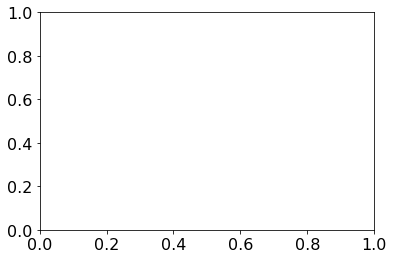

In [24]:
# Check autocorrelation of various variables in the df using 
from statsmodels.graphics.tsaplots import plot_acf
import itertools
#train_weather_df.set_index('timestamp',inplace=True)
plt.rcParams.update({'font.size': 16})
#fig, axs = plt.subplots(len(train_weather_df.columns)//2+1,2, figsize=(5*int(len(train_weather_df.columns)//2+1), 20),sharex='col')
#axs= axs.ravel()
#for i,col in enumerate(train_weather_df.columns):
 #   axs[i] = plot_acf(train_weather_df[col], lags=31)
_df = train_weather_df[train_weather_df.site_id == 0]['Electricity']
_df = _df.fillna(_df.mean())
plot_acf(, lags=31)
plt.show()

***To Check for stationary we perform adfuller test on the train_weather_grpsite_df and later on train_weather_df***

In [25]:
from statsmodels.tsa.stattools import adfuller 

In [26]:
def test_stationarity(df_timeseries):

    #rolling statistics
    rolmean = df_timeseries.rolling(window=12).mean()
    rolstd = df_timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(15, 7))
    orig = plt.plot(df_timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df_timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [1]:
_df = train_weather_df[train_weather_df.site_id == 0]['Electricity']
_df = _df.fillna(0)
test_stationarity(_df)

NameError: name 'train_weather_df' is not defined

***Ho: the series is not stationary. It has some time dependent structure.
As the p-value is <0.05 and the Test Statistic < than 1% critical value , we reject the null hypothesis and the series is stationary. We can get similar statistic for the other series(columns too) for all the sites.***

In [ ]:
test_stationarity(train_weather_grpsite_df.loc[(3,slice(None))]['Electricity'])

In [ ]:
#Perform Dickey-Fuller test:
def is_stationary(df_timeseries):
    dftest = adfuller(df_timeseries, autolag='AIC')
    stationary = (dftest[0] < dftest[4].get('10%'))
    return str(stationary) + str(dftest[0]) + " " + str(dftest[4].get('10%'))

In [ ]:
cols = ['Electricity','ChilledWater','Steam','HotWater','air_temperature','cloud_coverage',\
        'dew_temperature','precip_depth_1_hr', 'sea_level_pressure','wind_direction','wind_speed']

In [ ]:
print("Percentage null values for the train_weather_df:\n{}".format(percentage_null(train_weather_grpsite_df)))

In [3]:
is_stationary_df = pd.DataFrame()
for col in cols:
    is_stationary_df = train_weather_grpsite_df[col].unstack(0).interpolate(limit_direction='both').\
                        dropna(axis=1).apply(lambda x: is_stationary(x))
    print("Is timeseries for {} stationary?".format(col))
    print(is_stationary_df)

NameError: name 'pd' is not defined

In [ ]:
is_stationarity(train_weather_grpsite_df.loc[(3,slice(None))]['Electricity'].resample('12H').mean())

#Let's plot the autocorrelation graphs of all the columns beggining with electricity.

In [ ]:
train_build_df.groupby(['site_id','timestamp']).sum().loc[(3,slice(None))]['Electricity'].resample('12H').mean().plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
_=train_weather_grpsite_df.loc[(3,slice(None))]['Electricity'].diff(4)
plot_pacf(_)

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
cols_to_scale = train_weather_df.columns.difference(['timestamp','building_id','meter','site_id'])
scaler = PowerTransformer()
tw_scaled_df = train_weather_df.copy()
tw_scaled_df[cols_to_scale] = scaler.fit_transform(train_weather_df[cols_to_scale])

In [ ]:
tw_scaled_df.describe().T

In [ ]:
_df = tw_scaled_df.set_index(['timestamp'])[['meter','site_id']].value_counts()
for i in range(4):
    print("The top 2 sites with highest count of meter readings for meter{} is :{}".\
          format(i,_df.loc[i,:].sort_values(ascending=False).head(2)))

**With the help of these counts we can narrow are EDA to site13-(Meter0 & Meter2) and site2-(Meter0 & Meter2)**

In [ ]:
fig, axs = plt.subplots(4,1,figsize=(20,4*4),sharex=True)
cols = tw_scaled_df.columns.difference(['building_id','meter','site_id'])

#for i in tw_scaled_idx_df.site_id.unique():
tw_scaled_df[(tw_scaled_df.meter==0) & (tw_scaled_df.site_id==3)][cols].set_index(['timestamp']).\
                resample('M').mean().plot(ax=axs[0],ylabel="meter 0 & site 3",legend=True)
tw_scaled_df[(tw_scaled_df.meter==2) & (tw_scaled_df.site_id==13)][cols].set_index(['timestamp']).\
                resample('M').mean().plot(ax=axs[1],ylabel="meter 2 & site 13",legend=True)
tw_scaled_df[(tw_scaled_df.meter==1) & (tw_scaled_df.site_id==2)][cols].set_index(['timestamp']).\
                resample('M').mean().plot(ax=axs[2],ylabel="meter 1 & site 2",legend=True)
tw_scaled_df[(tw_scaled_df.meter==3) & (tw_scaled_df.site_id==2)][cols].set_index(['timestamp']).\
                resample('M').mean().plot(ax=axs[3],ylabel="meter 3 & site 2",legend=True)


In [ ]:
tw_scaled_df.columns

In [ ]:
4660000*6/94